誤差逆伝搬法を使った学習

In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [3]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [4]:
# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

In [6]:
networks = {}
train_loss = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []   

In [7]:
# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.4230804963245873
Momentum:2.3531494824054073
AdaGrad:1.9429941544386955
Adam:2.231222320936027
===========iteration:100===========
SGD:1.4358720316985984
Momentum:0.4375235877012937
AdaGrad:0.1511744950549474
Adam:0.29631270115424896
===========iteration:200===========
SGD:0.7980984946743711
Momentum:0.24793179417899303
AdaGrad:0.09545123114962703
Adam:0.17150981506243085
===========iteration:300===========
SGD:0.37900924455929674
Momentum:0.13370026773748467
AdaGrad:0.03110212941744069
Adam:0.09264083398308966
===========iteration:400===========
SGD:0.5163080674891926
Momentum:0.19061416392218714
AdaGrad:0.11796782415007864
Adam:0.14263505367174814
===========iteration:500===========
SGD:0.37094358793809923
Momentum:0.18401882722732724
AdaGrad:0.07150409735416667
Adam:0.11681288706562853
===========iteration:600===========
SGD:0.47921703875953037
Momentum:0.180703456208907
AdaGrad:0.07378432356184157
Adam:0.1441625659408225
===========iteration:

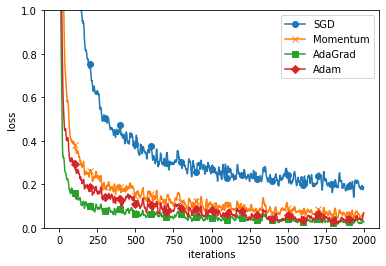

In [8]:
# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()